### Libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import datasets,models,layers
import tensorflow as tf

In [2]:
Train_data = pd.read_csv(r'C:\Users\PC\Downloads\Twitter_Sentiment_data\Train_data.csv',header=None, encoding='latin-1')
Test_data = pd.read_csv(r'C:\Users\PC\Downloads\Twitter_Sentiment_data\Test_data.csv',header=None, encoding='latin-1')

In [3]:
# Concatenate the train and test data
df = pd.concat([Train_data, Test_data], axis=0)

# Optionally, reset the index of the concatenated data
#concatenated_data.reset_index(drop=True, inplace=True)

# Save the concatenated data to a new file
#df.to_csv('concatenated_data.csv', index=False)

In [4]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
df

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
493,2,14072,Sun Jun 14 04:31:43 UTC 2009,latex,proggit,Ask Programming: LaTeX or InDesign?: submitted...
494,0,14073,Sun Jun 14 04:32:17 UTC 2009,latex,sam33r,"On that note, I hate Word. I hate Pages. I hat..."
495,4,14074,Sun Jun 14 04:36:34 UTC 2009,latex,iamtheonlyjosie,Ahhh... back in a *real* text editing environm...
496,0,14075,Sun Jun 14 21:36:07 UTC 2009,iran,plutopup7,"Trouble in Iran, I see. Hmm. Iran. Iran so far..."


### Data Preprocessing

In [6]:
df = df[[5, 0]]

In [7]:
df.columns=['Text', 'Sentiment']

In [8]:
df['Sentiment'].unique()

array([0, 4, 2], dtype=int64)

###
0 -> indicates negative

2 -> neutral

4 -> indicates positive

In [9]:
# Mapping the 4 by 1
df["Sentiment"]=df["Sentiment"].replace(4,1)

C:\Users\PC\AppData\Local\Temp\ipykernel_13764\1493800354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sentiment"]=df["Sentiment"].replace(4,1)


In [10]:
df['Sentiment'].unique()

array([0, 1, 2], dtype=int64)

In [11]:
df

,Text,Sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
...,...,...
493,Ask Programming: LaTeX or InDesign?: submitted...,2
494,"On that note, I hate Word. I hate Pages. I hat...",0
495,Ahhh... back in a *real* text editing environm...,1
496,"Trouble in Iran, I see. Hmm. Iran. Iran so far...",0


In [12]:
# Shuffling
df = df.sample(frac=1).reset_index(drop=True)

In [13]:
df

,Text,Sentiment
0,I thae rodws nma. I uhgthot I dha a rpteyt gbi...,1
1,my poor puppy has a fractured scapula! He can'...,0
2,how do i shorten url's its not working for me,0
3,first day of classes is not so bad - except fo...,1
4,Become a fan http://bit.ly/g8jrq,1
...,...,...
1600493,@niallok yep but time for rounds now,1
1600494,Probably my favorite thing about lbk is how ma...,0
1600495,finally got my last grade. 3.74 I am awesome!,1
1600496,@_Stems Awww Hope you feel better. Colds suck...,0


### NLP processing

### Preprocess the text data by removing special characters, URLs, and mentions using regular expressions:

In [14]:
# Replacing by empty string...
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

df['Text'] = df['Text'].apply(clean_text)

In [15]:
# Split
X = df['Text']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train.shape

(1280398,)

In [17]:
X_test.shape

(320100,)

In [18]:
X_train[0]

'I thae rodws nma I uhgthot I dha a rpteyt gbi uvolbacyra tbu rfate tcwahgni quotWord Warsquot I liraeze I dnot AntiScrabble movement baby '

### Sentence segmentation

### because many algorithms and tools operate on the sentence level rather than the entire text.

##### NLP ex:

In [19]:
# the word_index dictionary maps each unique word/token in the text_data to its assigned index.
"""
text_data = [
    "This is the first sentence.",
    "And this is the second sentence.",
    "Finally, here's the third sentence."
]


tokenizer = Tokenizer(num_words=5)
tokenizer.fit_on_texts(text_data)
print(tokenizer.word_index)
"""

'\ntext_data = [\n    "This is the first sentence.",\n    "And this is the second sentence.",\n    "Finally, here\'s the third sentence."\n]\n\n\ntokenizer = Tokenizer(num_words=5)\ntokenizer.fit_on_texts(text_data)\nprint(tokenizer.word_index)\n'

In [20]:
# Convert text to sequences of integers:

#text_data = tokenizer.texts_to_sequences(text_data)

In [21]:
# text_data

In [22]:
max_features = 10000  # Maximum number of words to keep
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

In [23]:
# Convert text to sequences of integers
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [24]:
X_train

[[1160,
  11,
  140,
  135,
  21,
  21,
  5,
  1372,
  3114,
  97,
  6,
  1534,
  3,
  429,
  288,
  338,
  5817,
  94,
  2,
  46],
 [461, 3061, 376, 865],
 [13, 442, 233],
 [94, 20, 310, 34, 107, 94, 48, 232, 3, 6038, 9397, 10, 3003, 15],
 [29, 578, 111, 25],
 [5246, 9398, 18, 5784, 112, 38],
 [14,
  4,
  5878,
  1153,
  293,
  79,
  97,
  91,
  43,
  2,
  64,
  931,
  50,
  931,
  287,
  288,
  23,
  10,
  362,
  155,
  362],
 [1, 146, 170, 1265, 849, 295, 1, 17, 2, 549, 10, 9],
 [103,
  197,
  66,
  5,
  181,
  8,
  2802,
  28,
  130,
  1,
  246,
  1366,
  2,
  3,
  12,
  2470,
  33,
  24],
 [1,
  57,
  54,
  7,
  359,
  58,
  113,
  17,
  3,
  1181,
  153,
  2,
  257,
  21,
  19,
  126,
  127,
  8583,
  1,
  47,
  420],
 [165, 64, 3, 1398, 1867, 216, 6, 242, 3, 89, 4143, 530, 867],
 [24, 16, 366, 1, 20, 533, 18, 456, 18, 8, 4, 197, 75],
 [88, 2, 342, 1014, 30, 1135, 302, 1, 61, 1694, 10, 3, 423, 31, 28],
 [557,
  66,
  363,
  9857,
  7804,
  86,
  25,
  3,
  247,
  77,
  170,
  9,


In [25]:
X_test

[[67,
  9,
  126,
  30,
  2,
  15,
  1,
  117,
  124,
  42,
  3603,
  1431,
  31,
  19,
  8,
  25,
  16,
  1,
  239,
  24,
  20,
  320],
 [1, 104, 80, 334, 22, 4, 1747, 1054, 1399, 157, 2031, 6, 1253, 2031, 44, 83],
 [20,
  303,
  32,
  466,
  2,
  9,
  24,
  25,
  101,
  1714,
  16,
  9,
  20,
  3295,
  14,
  397,
  6,
  5,
  1267,
  3212,
  1,
  45,
  7,
  79,
  272],
 [93, 256, 143, 186, 29],
 [141, 58, 6538, 20, 33, 48, 16, 1070, 30, 11, 9, 33, 1538],
 [3670, 28, 203, 12, 1590],
 [158, 7, 33, 16, 254, 2126, 46, 10, 5, 491],
 [3, 8448, 242, 125, 23, 709],
 [493, 415, 167],
 [1997,
  1678,
  4699,
  621,
  1009,
  50,
  6931,
  701,
  155,
  1,
  61,
  512,
  12,
  3,
  12,
  144,
  18,
  491],
 [93, 9615, 96, 7, 62, 4, 131, 114, 24, 578, 49, 86],
 [439,
  7,
  255,
  2,
  124,
  9,
  689,
  6,
  32,
  199,
  862,
  399,
  49,
  132,
  1837,
  380,
  23,
  3,
  866,
  192],
 [4724, 664, 35, 273, 18, 261, 12, 3, 4427, 2, 4, 1783, 15, 12, 1161, 2438],
 [1, 20, 4470, 11, 5, 311, 39, 632

### The pad_sequences function is typically used to ensure that all input sequences have the same length. It pads or truncates the sequences to a specified maximum length.

In [26]:
max_len = 100  # Maximum length of a sequence
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [27]:
X_train.shape

(1280398, 100)

In [28]:
X_test.shape

(320100, 100)

In [29]:
X_train

array([[   0,    0,    0, ...,   94,    2,   46],
       [   0,    0,    0, ..., 3061,  376,  865],
       [   0,    0,    0, ...,   13,  442,  233],
       ...,
       [   0,    0,    0, ...,   57,  143,  581],
       [   0,    0,    0, ...,  134,   23,   71],
       [   0,    0,    0, ...,  257,    3,   31]])

In [43]:
# The Conv1D layer expects a 3D input shape of (batch_size, sequence_length, input_dimension).
input_dim=1
input_shape = (max_len, input_dim)
embedding_dim = 100

###
Embedding layer maps these integers to dense vectors of embedding_dim dimensions and 

capture the semantic relationships between words or tokens

In [47]:
CNN=models.Sequential([
    layers.Embedding(max_features, embedding_dim, input_length=max_len),
    layers.Conv1D(filters=32,kernel_size=5,activation='relu'),
    layers.MaxPooling1D(4),
    
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])

In [48]:
CNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
CNN.fit(X_train, y_train, epochs=5)

Epoch 1/5
40013/40013 [==============================] - 394s 10ms/step - loss: 0.4285 - accuracy: 0.8034
Epoch 2/5
40013/40013 [==============================] - 382s 10ms/step - loss: 0.3922 - accuracy: 0.8246
Epoch 3/5
40013/40013 [==============================] - 378s 9ms/step - loss: 0.3692 - accuracy: 0.8372
Epoch 4/5
40013/40013 [==============================] - 375s 9ms/step - loss: 0.3469 - accuracy: 0.8492
Epoch 5/5
40013/40013 [==============================] - 377s 9ms/step - loss: 0.3256 - accuracy: 0.8605


In [50]:
CNN.evaluate(X_test,y_test)

10004/10004 [==============================] - 21s 2ms/step - loss: 0.4370 - accuracy: 0.8077


[0.4370250999927521, 0.8076850771903992]

In [51]:
y_pred = CNN.predict(X_test)

10004/10004 [==============================] - 20s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

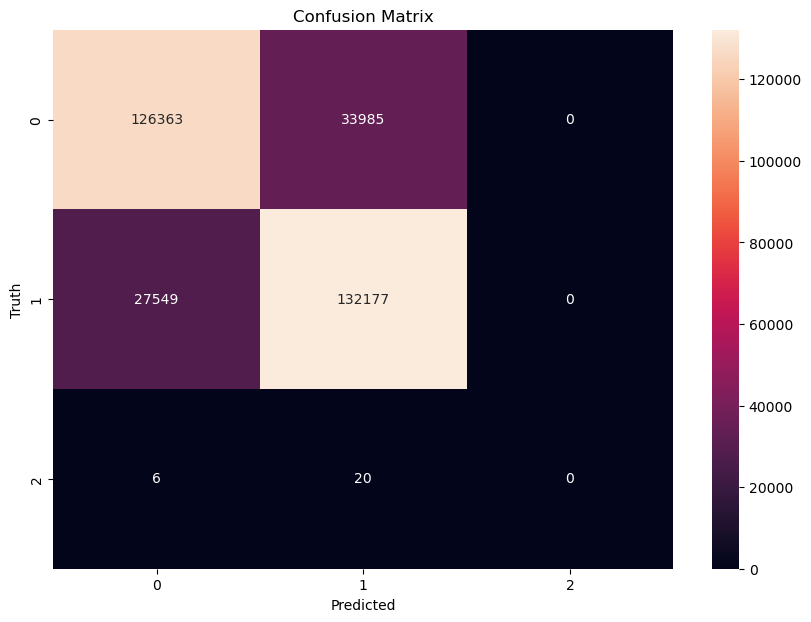

In [72]:
y_pred_rounded = np.round(y_pred)
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_rounded)


plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')